In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import scipy.stats as stats

In [2]:
def confidence_interval(array, confidence=0.95):
    return stats.t.interval(confidence, len(array)-1, loc=np.mean(array), scale=stats.sem(array))

def find_2nd(string, substring):
   return string.find(substring, string.find(substring) + 1)

In [4]:
df = pd.read_pickle("../exp_outputs/fitness_eval_comparison/eval_results.pkl")

# We only have complete data for the first 5 trials
df = df[df["trial"] < 5]

<BarContainer object of 4 artists>

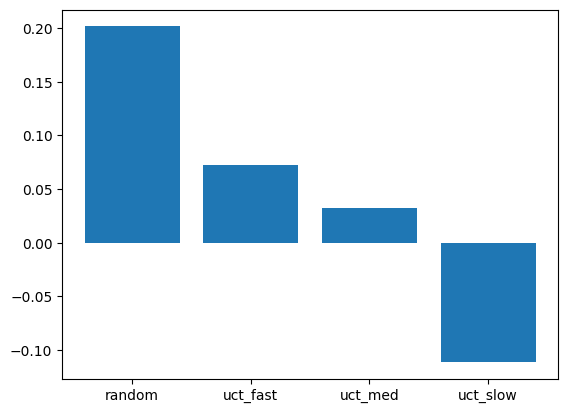

In [14]:
results = defaultdict(list)
for regime, group in df.groupby("regime"):
    fitness = group["fitness"].mean()
    results["regime"].append(regime)
    results["fitness"].append(fitness)

# Bar plot
plt.bar(results["regime"], results["fitness"])


In [43]:
results = defaultdict(list)
names = []
for (game_str, regime), group in df.groupby(["game_str", "regime"]):
    fitness = group["fitness"].mean()
    interval = confidence_interval(group["fitness"])
    # results[regime].append((fitness, interval))

    if fitness > 0:
        results[regime].append(fitness)

        name = name = game_str[game_str.find('"')+1:find_2nd(game_str, '"')]
        if name not in names:
            names.append(name)


/Users/gray/anaconda3/envs/ludii-lms/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2244: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/gray/anaconda3/envs/ludii-lms/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2245: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Text(0, 0.5, 'Fitness')

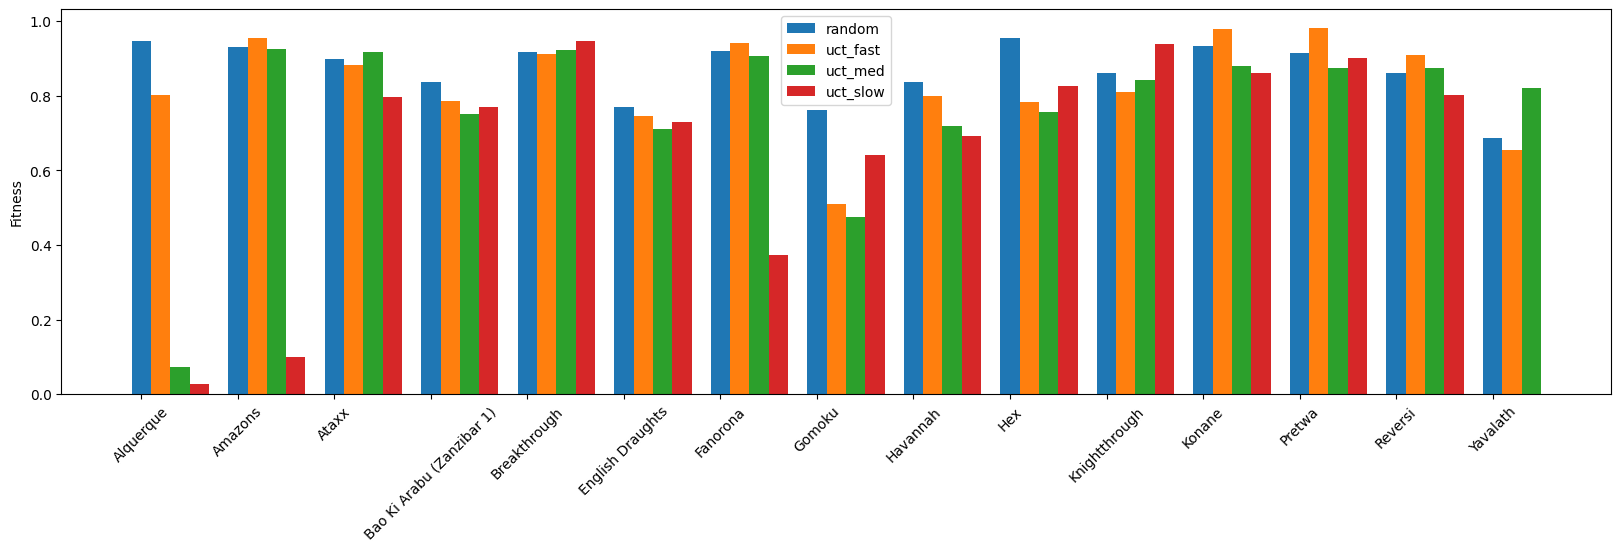

In [44]:
# Wide plot
fig = plt.figure(figsize=(20, 5))
for idx, regime in enumerate(results):
    offset = 0.2 * (idx)
    plt.bar([x + offset for x in range(len(results[regime]))], results[regime], width=0.2, label=regime)

plt.xticks(range(len(names)), names, rotation=45)
plt.legend()
plt.ylabel("Fitness")

In [32]:
board_size_comp_df = pd.read_pickle("../exp_outputs/fitness_eval_comparison/board_size_results.pkl")
labels = ["Original Variant", "Square (5)", "Square (10)"]
markers = ["graph vertices", "square 5", "square 10"]

for label, marker in zip(labels, markers):
    board_size_comp_df.loc[board_size_comp_df["game_str"].str.contains(marker), "game_str"] = label

filtered_df = board_size_comp_df.groupby("game_str")[["fitness", "balance", "completion", "drawishness", "decision_moves", "trace_score", "board_coverage_default"]].mean()

# Reorder rows
filtered_df = filtered_df.reindex(labels)

# Add std for each field
filtered_df["fitness_std"] = board_size_comp_df.groupby("game_str")["fitness"].std()
filtered_df["balance_std"] = board_size_comp_df.groupby("game_str")["balance"].std()
filtered_df["completion_std"] = board_size_comp_df.groupby("game_str")["completion"].std()
filtered_df["drawishness_std"] = board_size_comp_df.groupby("game_str")["drawishness"].std()
filtered_df["decision_moves_std"] = board_size_comp_df.groupby("game_str")["decision_moves"].std()
filtered_df["trace_score_std"] = board_size_comp_df.groupby("game_str")["trace_score"].std()
filtered_df["board_coverage_default_std"] = board_size_comp_df.groupby("game_str")["board_coverage_default"].std()

print(f"Effects of board size on Notakto variant fitness, k=10 trials for eval, n=10 evals")
filtered_df

Effects of board size on Notakto variant fitness, k=10 trials for eval, n=10 evals


,fitness,balance,completion,drawishness,decision_moves,trace_score,board_coverage_default,fitness_std,balance_std,completion_std,drawishness_std,decision_moves_std,trace_score_std,board_coverage_default_std
game_str,,,,,,,,,,,,,,
Original Variant,0.817558,0.64,1.0,1.0,0.945612,0.9650,0.864615,0.219977,0.279850,0.0,0.0,0.011635,0.032847,0.066285
Square (5),0.864667,0.77,1.0,1.0,0.964411,0.9575,0.667800,0.041898,0.162546,0.0,0.0,0.010138,0.040636,0.050621
Square (10),0.751018,0.65,1.0,1.0,0.985552,0.9525,0.526150,0.190256,0.258538,0.0,0.0,0.002645,0.047226,0.014737


In [33]:
board_size_comp_df = pd.read_pickle("../exp_outputs/fitness_eval_comparison/board_size_results_2.pkl")
labels = ["Original Variant", "Square (5)", "Square (10)"]
markers = ["graph vertices", "square 5", "square 10"]

for label, marker in zip(labels, markers):
    board_size_comp_df.loc[board_size_comp_df["game_str"].str.contains(marker), "game_str"] = label

filtered_df = board_size_comp_df.groupby("game_str")[["fitness", "balance", "completion", "drawishness", "decision_moves", "trace_score", "board_coverage_default"]].mean()

# Reorder rows
filtered_df = filtered_df.reindex(labels)

# Add std for each field
filtered_df["fitness_std"] = board_size_comp_df.groupby("game_str")["fitness"].std()
filtered_df["balance_std"] = board_size_comp_df.groupby("game_str")["balance"].std()
filtered_df["completion_std"] = board_size_comp_df.groupby("game_str")["completion"].std()
filtered_df["drawishness_std"] = board_size_comp_df.groupby("game_str")["drawishness"].std()
filtered_df["decision_moves_std"] = board_size_comp_df.groupby("game_str")["decision_moves"].std()
filtered_df["trace_score_std"] = board_size_comp_df.groupby("game_str")["trace_score"].std()
filtered_df["board_coverage_default_std"] = board_size_comp_df.groupby("game_str")["board_coverage_default"].std()

print(f"Effects of board size on Notakto variant fitness, k=25 trials for eval, n=50 evals")
filtered_df

Effects of board size on Notakto variant fitness, k=25 trials for eval, n=50 evals


,fitness,balance,completion,drawishness,decision_moves,trace_score,board_coverage_default,fitness_std,balance_std,completion_std,drawishness_std,decision_moves_std,trace_score_std,board_coverage_default_std
game_str,,,,,,,,,,,,,,
Original Variant,0.822251,0.6040,1.0,1.0,0.942134,0.9720,0.874308,0.136294,0.276982,0.0,0.0,0.009498,0.038481,0.064485
Square (5),0.883580,0.8496,1.0,1.0,0.961373,0.9640,0.661664,0.026104,0.104697,0.0,0.0,0.007298,0.038977,0.047671
Square (10),0.838185,0.8424,1.0,1.0,0.985000,0.9685,0.527184,0.025457,0.122706,0.0,0.0,0.001901,0.042435,0.011961
